###TYPES OF FEATURES IMAGE SEGMENTATION
By Chetna Agarwal

###HARRIS CORNER DETECTION

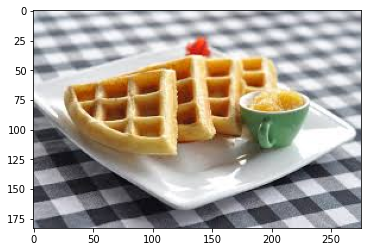

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

%matplotlib inline

image = cv2.imread('/content/drive/MyDrive/CV ND /1. Intro to CV/3. Types of features Image Segmentation/images/waffle.jpg')
image_copy = np.copy(image)

image_copy = cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB)

plt.imshow(image_copy)

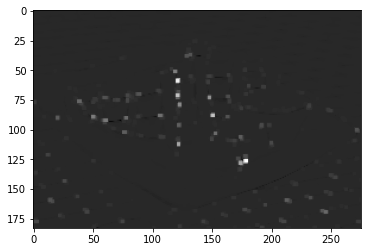

In [ ]:
# DETECT CORNERS

gray = cv2.cvtColor(image_copy, cv2.COLOR_RGB2GRAY)
gray = np.float32(gray)

# detect corners
dst = cv2.cornerHarris(gray, 2 , 3, 0.04)
# arguments - grayscale image, size of neighborhood to look at while identifying potential
# corners (here, 2X2 pixel square), size of sobel operator, constant value that helps 
# determine which points are corners (0.04 value is typical) - lower value will result
# in more corners 

# dilate corner image to enhance corner points
dst = cv2.dilate(dst, None)

plt.imshow(dst, cmap = 'gray')

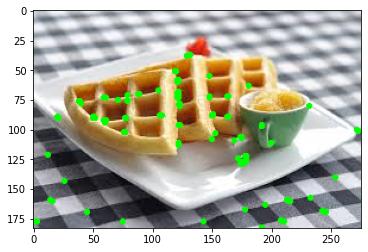

In [ ]:
# Extract and display strong corners
# Define a threshold for extracting strong corners - this value varies depending on the 
# image and how many corners we want to detect.

thresh = 0.1 * dst.max() # 10% of the maximum value

corner_image = np.copy(image_copy)

# iterate through all corners and draw them on the image (if they pass the threshold)

# iterate through all corners and draw on image if they pass threshold
for j in range(0, dst.shape[0]): 
  for i in range(0, dst.shape[1]):
    if(dst[j,i] > thresh):
      # image, center_point, radius, color, thickness
      cv2.circle(corner_image, (i, j), 1, (0, 255, 0), 1)
plt.imshow(corner_image)

###CONTOUR DETECTION AND FEATURES

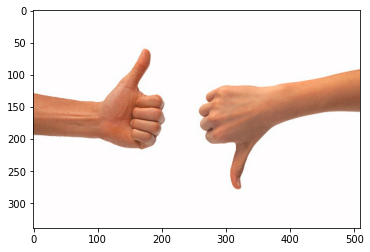

In [ ]:
image = cv2.imread('/content/drive/MyDrive/CV ND /1. Intro to CV/3. Types of features Image Segmentation/images/thumbs_up_down.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

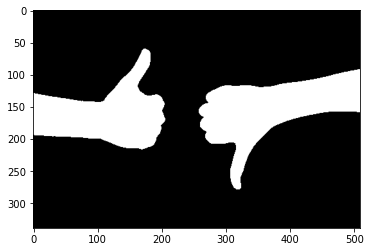

In [ ]:
# Produce a binary image for finding contours
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

# Create a binary thresholded image
retval, binary = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)

plt.imshow(binary, cmap ='gray')

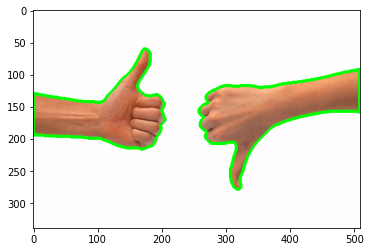

In [ ]:
# Find and draw contours
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# hierarchy is useful when we have contours nested within one another
# Draw all contours on a copy of the original image
contours_image = np.copy(image)
contours_image = cv2.drawContours(contours_image, contours, -1, (0,255,0), 3)
plt.imshow(contours_image)

In [ ]:
# CONTOUR FEATURES
# Every contour has a number of features we can calculate, including the area of 
# contour, it's orientation (the direction that most of the contour is pointing in),
# it's perimeter, etc.

###KMEANS

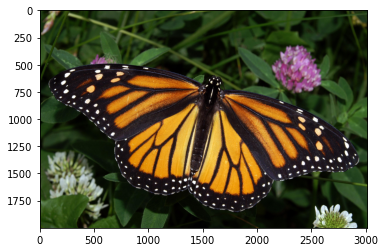

In [ ]:
image = cv2.imread('/content/drive/MyDrive/CV ND /1. Intro to CV/3. Types of features Image Segmentation/images/monarch.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [ ]:
# Reshape image into a 2d array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1, 3)) # (m,3) - m is the number of points

# convert to float type
pixel_vals = np.float32(pixel_vals)

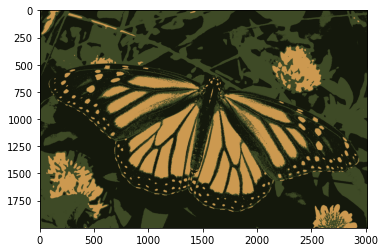

In [ ]:
# Implement KMeans clustering

# define stopping criteria
# can change the number of max iterations for faster convergence
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

k = 3
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

# convert data into 8 bit values
centers = np.uint(centers)
segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))
labels_reshape = labels.reshape(image.shape[0], image.shape[1])

plt.imshow(segmented_image)

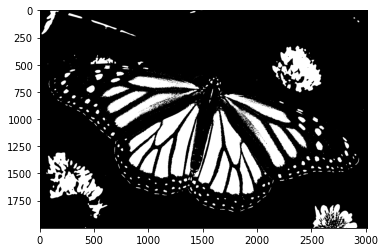

In [ ]:
plt.imshow(labels_reshape==0, cmap='gray')

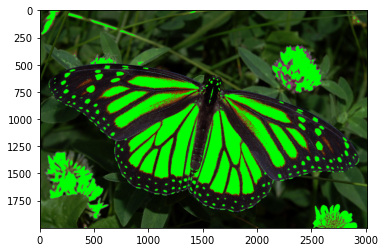

In [ ]:
# mask an image segment by cluster
cluster = 0 # the first cluster

masked_image = np.copy(image)
# turn the mask green
masked_image[labels_reshape == cluster] = [0, 255, 0]

plt.imshow(masked_image)